--- PRIME 5 RIGHE ---


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



--- STATISTICHE ---


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


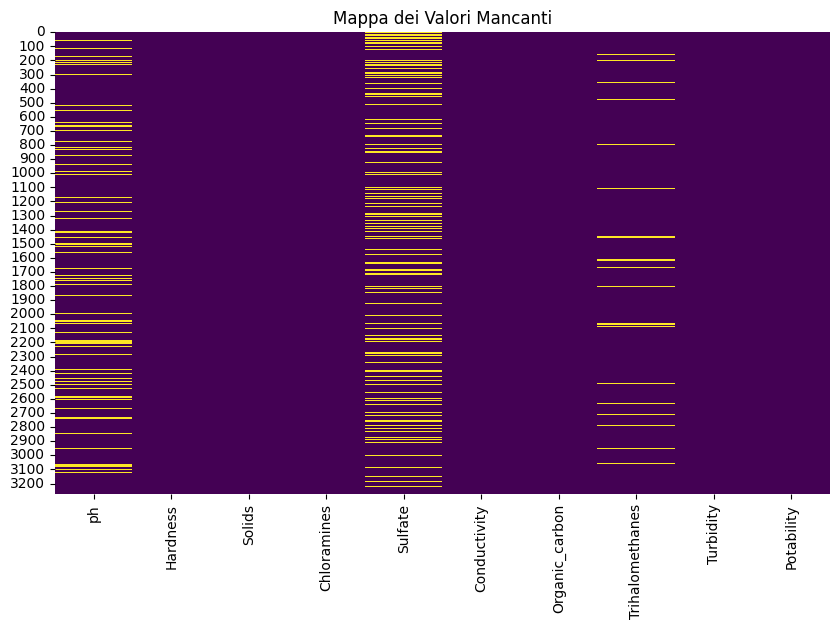

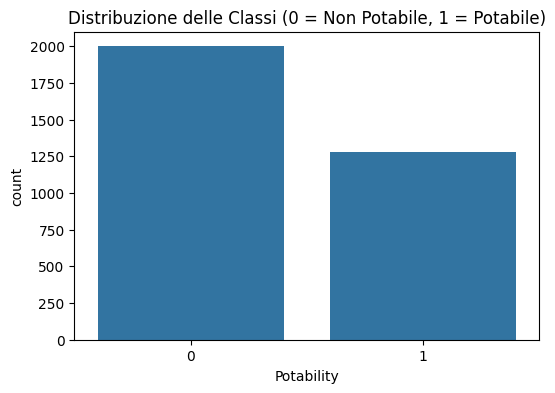

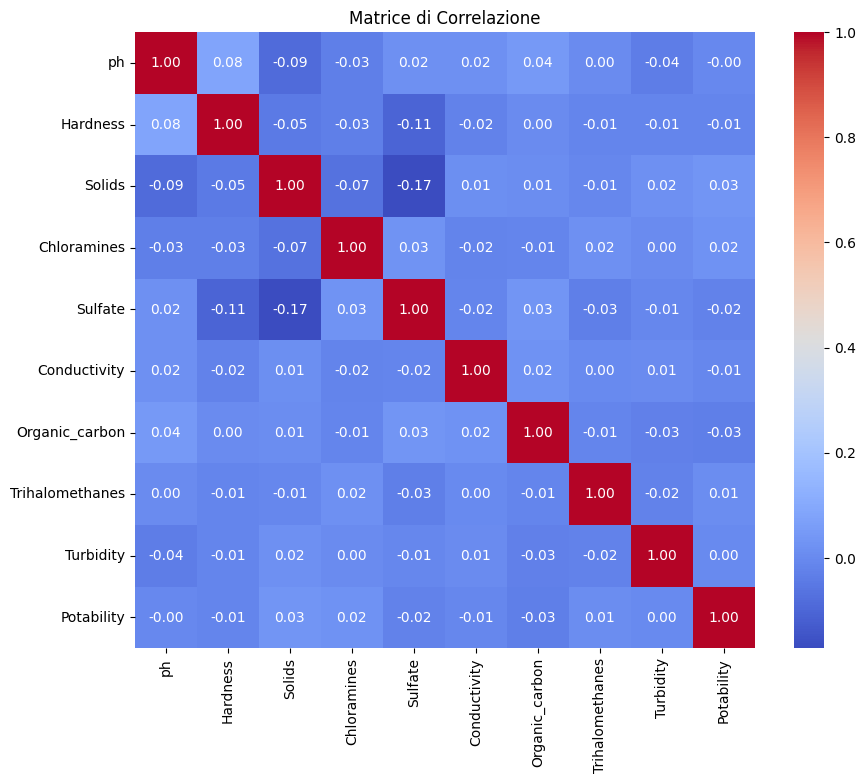

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('water_potability.csv')

print("--- PRIME 5 RIGHE ---")
display(df.head())

print("\n--- STATISTICHE ---")
display(df.describe())

# A. Visualizziamo i Valori Mancanti (Missing Values)
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mappa dei Valori Mancanti")
plt.show()

# B. Controlliamo lo Sbilanciamento delle Classi (Potability)
plt.figure(figsize=(6,4))
sns.countplot(x='Potability', data=df)
plt.title("Distribuzione delle Classi (0 = Non Potabile, 1 = Potabile)")
plt.show()

# C. Controlliamo le Correlazioni (Feature Ridondanti?)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice di Correlazione")
plt.show()

--- REPORT PRESTAZIONI ---
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       400
           1       0.63      0.30      0.41       256

    accuracy                           0.66       656
   macro avg       0.65      0.59      0.58       656
weighted avg       0.65      0.66      0.62       656



<Figure size 800x600 with 0 Axes>

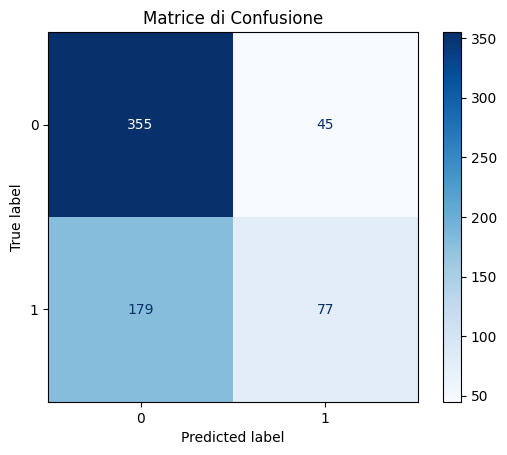

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1. RISOLVIAMO IL PROBLEMA DEI MISSING VALUES (Issue 1)
df['ph'] = df['ph'].fillna(df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

# 2. PREPARAZIONE DATI
X = df.drop('Potability', axis=1)
y = df['Potability']

# 3. DIVISIONE TRAIN/TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. CREAZIONE E ADDESTRAMENTO DEL MODELLO
modello = RandomForestClassifier(n_estimators=100, random_state=42)
modello.fit(X_train, y_train)

# 5. VALUTAZIONE E GRAFICO DEGLI ERRORI
y_pred = modello.predict(X_test)

print("--- REPORT PRESTAZIONI ---")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_estimator(modello, X_test, y_test, cmap='Blues')
plt.title("Matrice di Confusione")
plt.show()